In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [12]:
df_AE_A13 = pd.read_csv(r"C:\Users\lbenzemma\Desktop\Projets Master2 MOSEF\Projet Time Series\MOSEF---Projet-Time-Series\data\AE_A13_bretelle_5.csv")
df_Alesia = pd.read_csv(r"C:\Users\lbenzemma\Desktop\Projets Master2 MOSEF\Projet Time Series\MOSEF---Projet-Time-Series\data\Alesia.csv")
df_Amsterdam = pd.read_csv(r"C:\Users\lbenzemma\Desktop\Projets Master2 MOSEF\Projet Time Series\MOSEF---Projet-Time-Series\data\Amsterdam.csv")
df_Auber = pd.read_csv(r"C:\Users\lbenzemma\Desktop\Projets Master2 MOSEF\Projet Time Series\MOSEF---Projet-Time-Series\data\Auber.csv")


In [13]:
for df, name in zip([df_AE_A13, df_Alesia, df_Amsterdam, df_Auber], 
                    ['AE_A13_bretelle_5', 'Alesia', 'Amsterdam', 'Auber']):
    print(f"--- {name} ---")
    print(df.info())
    print(df.head(), "\n")

--- AE_A13_bretelle_5 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iu_ac             8292 non-null   int64  
 1   libelle           8292 non-null   object 
 2   t_1h              8292 non-null   object 
 3   q                 2476 non-null   float64
 4   k                 2477 non-null   float64
 5   etat_trafic       8292 non-null   object 
 6   iu_nd_amont       8292 non-null   int64  
 7   libelle_nd_amont  8292 non-null   object 
 8   iu_nd_aval        8292 non-null   int64  
 9   libelle_nd_aval   8292 non-null   object 
 10  etat_barre        8292 non-null   object 
 11  date_debut        8268 non-null   object 
 12  date_fin          8268 non-null   object 
 13  geo_point_2d      8268 non-null   object 
 14  geo_shape         8268 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 971.8+ KB
Non

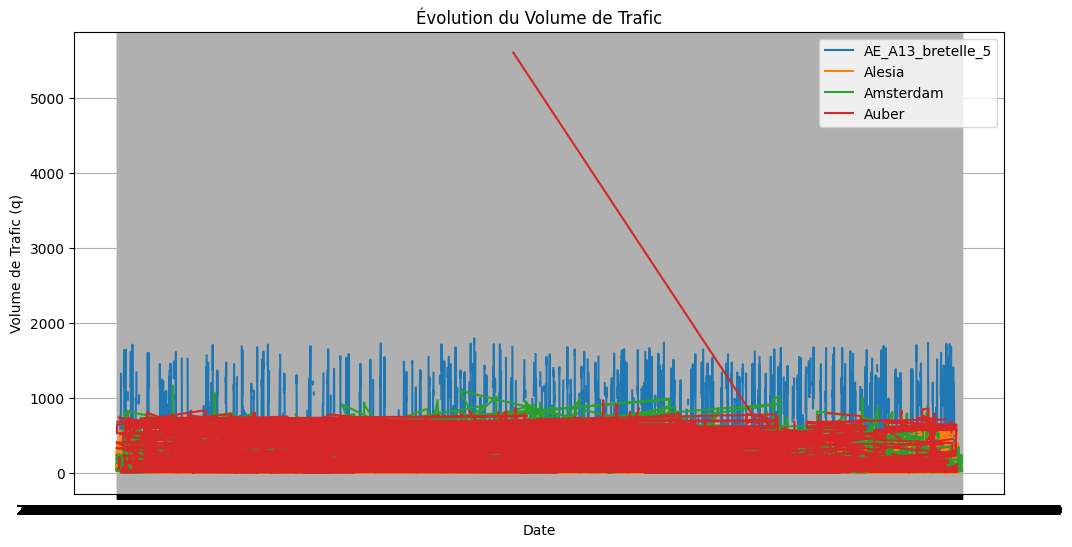

In [14]:
plt.figure(figsize=(12, 6))

for df, name in zip([df_AE_A13, df_Alesia, df_Amsterdam, df_Auber], 
                    ['AE_A13_bretelle_5', 'Alesia', 'Amsterdam', 'Auber']):
    plt.plot(df['t_1h'], df['q'], label=name)

plt.title("Évolution du Volume de Trafic")
plt.xlabel("Date")
plt.ylabel("Volume de Trafic (q)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
missing_values = {}

for df, name in zip([df_AE_A13, df_Alesia, df_Amsterdam, df_Auber], 
                    ['AE_A13_bretelle_5', 'Alesia', 'Amsterdam', 'Auber']):
    missing_q = df['q'].isnull().sum()
    missing_k = df['k'].isnull().sum()
    total_rows = df.shape[0]
    
    percent_missing_q = (missing_q / total_rows) * 100
    percent_missing_k = (missing_k / total_rows) * 100
    
    missing_values[name] = {
        'Total Entrées': total_rows,
        'Valeurs Manquantes (Débit Horaire - q)': missing_q,
        '% Manquantes (Débit Horaire - q)': percent_missing_q,
        'Valeurs Manquantes (Taux de Trafic - k)': missing_k,
        '% Manquantes (Taux de Trafic - k)': percent_missing_k
    }


df_missing_values = pd.DataFrame(missing_values).T

style = """
    <style>
        table {border-collapse: collapse; width: 80%; margin: 20px auto; font-family: Arial, sans-serif;}
        th, td {border: 1px solid #dddddd; text-align: center; padding: 10px; color: black;}
        th {background-color: #4CAF50; color: white; font-size: 16px;}
        tr:nth-child(even) {background-color: #f2f2f2;}
        tr:nth-child(odd) {background-color: #ffffff;}
        td {font-size: 14px;}
    </style>
"""

html_table = style + df_missing_values.to_html()
display(HTML(html_table))

,Total Entrées,Valeurs Manquantes (Débit Horaire - q),% Manquantes (Débit Horaire - q),Valeurs Manquantes (Taux de Trafic - k),% Manquantes (Taux de Trafic - k)
AE_A13_bretelle_5,8292.0,5816.0,70.139894,5815.0,70.127834
Alesia,149112.0,50583.0,33.922823,63399.0,42.517705
Amsterdam,33264.0,7664.0,23.039923,23773.0,71.467653
Auber,24972.0,20287.0,81.238988,19800.0,79.288803
